# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [87]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [103]:
# loading the data: Wholesale customers data
customer = pd.read_csv("Wholesale customers data.csv")

#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [41]:
# Mostrar las primeras filas del conjunto de datos
customer.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Channel_2_True,Region_2_True,Region_3_True
0,12669,9656,7561,214,2674,1338,34112,True,False,True
1,7057,9810,9568,1762,3293,1776,33266,True,False,True
2,6353,8808,7684,2405,3516,7844,36610,True,False,True
3,13265,1196,4221,6404,507,1788,27381,False,False,True
4,22615,5410,7198,3915,1777,5185,46100,True,False,True


In [43]:
# Información sobre el conjunto de datos
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
 6   Total_Spending    440 non-null    int64
 7   Channel_2_True    440 non-null    bool 
 8   Region_2_True     440 non-null    bool 
 9   Region_3_True     440 non-null    bool 
dtypes: bool(3), int64(7)
memory usage: 25.5 KB


In [45]:
# Estadísticas descriptivas
customer.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [47]:
print(customer.columns)

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'Total_Spending', 'Channel_2_True', 'Region_2_True', 'Region_3_True'],
      dtype='object')


In [51]:
# Convertir la columna 'Channel' y 'Region' en variables categóricas (dummies)
customer = pd.get_dummies(customer, columns=['Channel_2_True', "Region_2_True", "Region_3_True"], drop_first=True)
customer

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spending,Channel_2_True_True,Region_2_True_True,Region_3_True_True
0,12669,9656,7561,214,2674,1338,34112,True,False,True
1,7057,9810,9568,1762,3293,1776,33266,True,False,True
2,6353,8808,7684,2405,3516,7844,36610,True,False,True
3,13265,1196,4221,6404,507,1788,27381,False,False,True
4,22615,5410,7198,3915,1777,5185,46100,True,False,True
...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,73302,False,False,True
436,39228,1431,764,4510,93,2346,48372,False,False,True
437,14531,15488,30243,437,14841,1867,77407,True,False,True
438,10290,1981,2232,1038,168,2125,17834,False,False,True


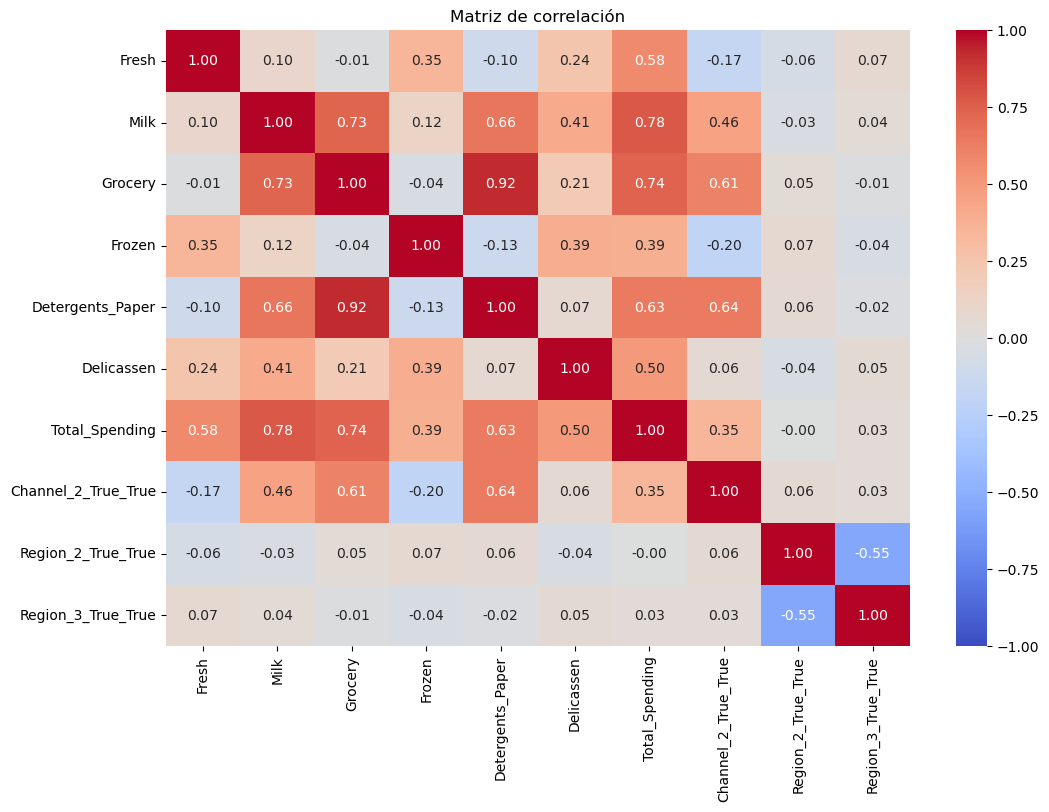

In [53]:
# Calcular la matriz de correlación
correlation_matrix = customer.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()


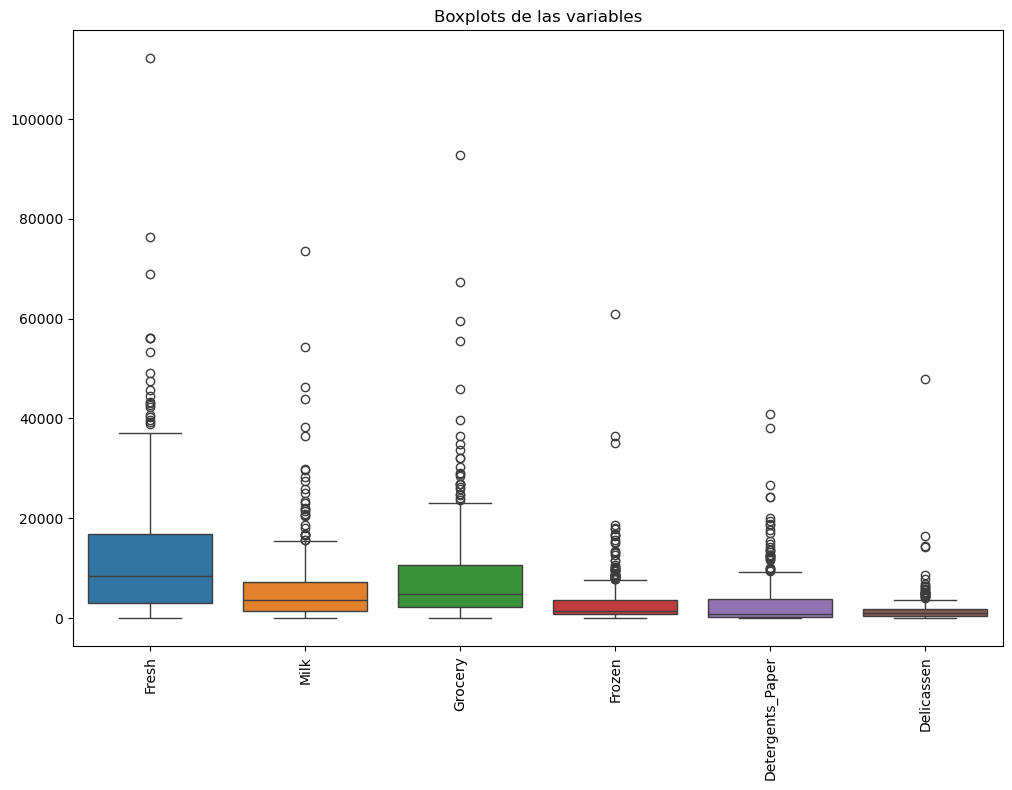

In [55]:
# Visualización de boxplots para identificar valores atípicos
plt.figure(figsize=(12, 8))
sns.boxplot(data=customer[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.xticks(rotation=90)
plt.title('Boxplots de las variables')
plt.show()

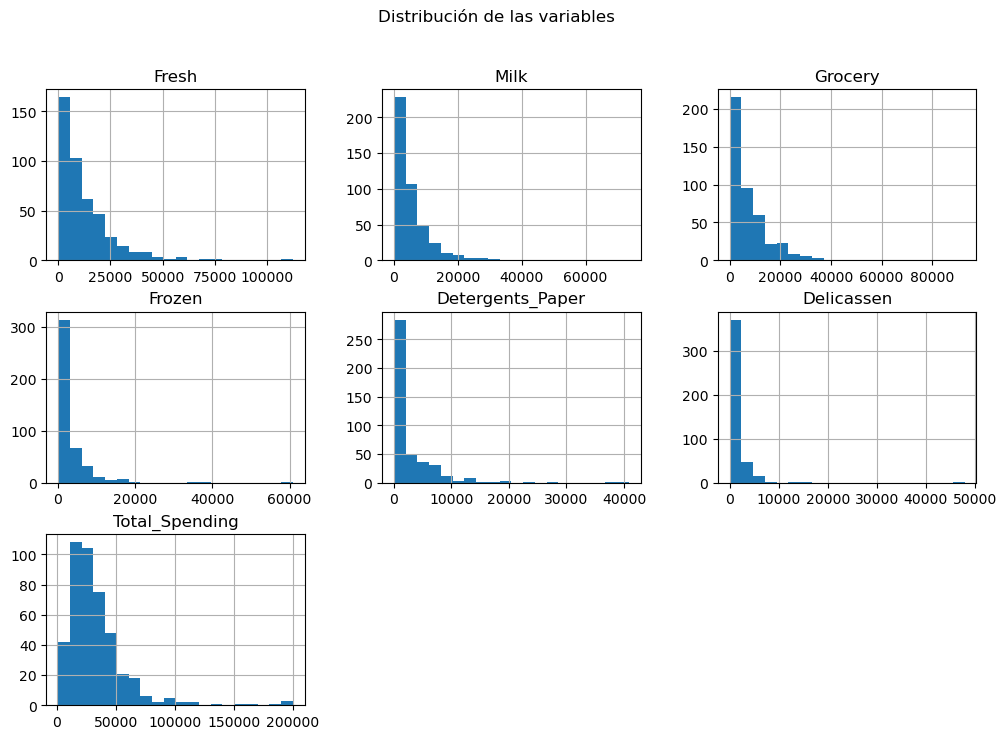

C:\Users\bader\AppData\Local\Temp\ipykernel_16744\1834712689.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(customer['Milk'], shade=True)


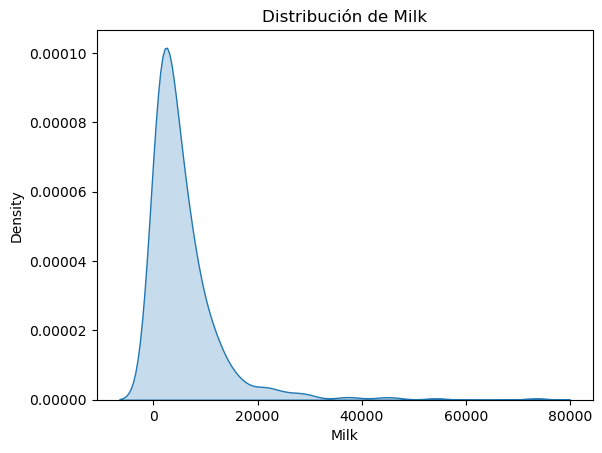

In [57]:
# Visualización de histogramas para examinar la distribución
customer.hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribución de las variables')
plt.show()

# Examinar la distribución de una variable específica
sns.kdeplot(customer['Milk'], shade=True)
plt.title('Distribución de Milk')
plt.show()


In [59]:
# Calcular el gasto total por cliente (sumando todas las columnas de gasto)
customer['Total_Spending'] = customer[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

# Ordenar los clientes por el gasto total de manera descendente
customer_sorted = customer.sort_values(by='Total_Spending', ascending=False)

# Calcular el porcentaje acumulado de ventas
customer_sorted['Cumulative_Spending'] = customer_sorted['Total_Spending'].cumsum() / customer_sorted['Total_Spending'].sum()

# Ver cuántos clientes están en el 80% superior
pareto_cutoff = customer_sorted[customer_sorted['Cumulative_Spending'] <= 0.80]

# Mostrar cuántos clientes representan el 80% de las ventas
pareto_cutoff.tail(1), len(pareto_cutoff)


(     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
 307  17327  2374     2842    1149               351         925   
 
      Total_Spending  Channel_2_True_True  Region_2_True_True  \
 307           24968                False                True   
 
      Region_3_True_True  Cumulative_Spending  
 307               False             0.799737  ,
 251)

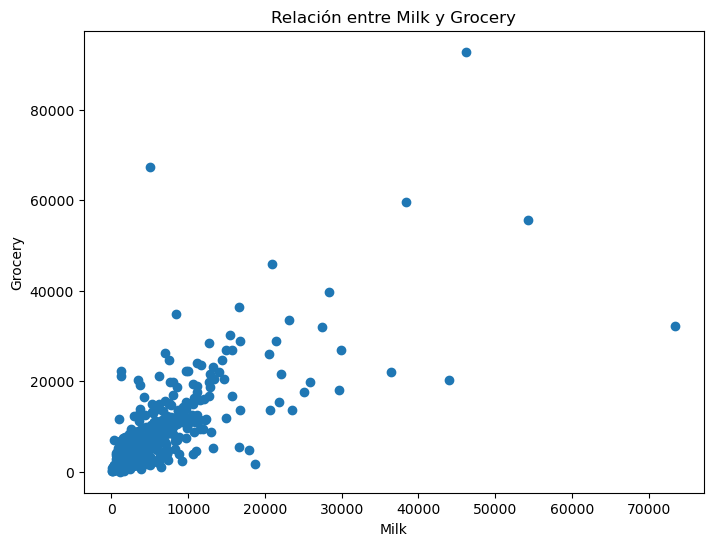

In [63]:
# Gráfico de dispersión entre dos columnas, por ejemplo, 'Milk' y 'Grocery'
plt.figure(figsize=(8, 6))
plt.scatter(customer['Milk'], customer['Grocery'])
plt.title('Relación entre Milk y Grocery')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()


# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [91]:
# Your code here
# Comprobación de valores faltantes
print(customer.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [115]:
# Convertir las columnas 'Channel' y 'Region' en variables dummies (variables binarias)
customer = pd.get_dummies(customer, columns=['Channel', 'Region'], drop_first=True)

In [117]:
customer

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,True,False,True
1,7057,9810,9568,1762,3293,1776,True,False,True
2,6353,8808,7684,2405,3516,7844,True,False,True
3,13265,1196,4221,6404,507,1788,False,False,True
4,22615,5410,7198,3915,1777,5185,True,False,True
...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,False,False,True
436,39228,1431,764,4510,93,2346,False,False,True
437,14531,15488,30243,437,14841,1867,True,False,True
438,10290,1981,2232,1038,168,2125,False,False,True


In [121]:
# Eliminar filas donde el gasto en 'Fresh' es mayor que 50,000 (un valor atípico)
customer_cleaned = customer[customer['Fresh'] <= 50000]
customer_cleaned

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,True,False,True
1,7057,9810,9568,1762,3293,1776,True,False,True
2,6353,8808,7684,2405,3516,7844,True,False,True
3,13265,1196,4221,6404,507,1788,False,False,True
4,22615,5410,7198,3915,1777,5185,True,False,True
...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,False,False,True
436,39228,1431,764,4510,93,2346,False,False,True
437,14531,15488,30243,437,14841,1867,True,False,True
438,10290,1981,2232,1038,168,2125,False,False,True


In [134]:
# Verificar que no hay valores nulos
print(customer.isnull().sum())

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Channel_2           0
Region_2            0
Region_3            0
dtype: int64


# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [136]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas numéricas para el escalado
numeric_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Aplicamos el escalado y asignamos los resultados a la nueva variable 'customers_scale'
customers_scale = customer.copy()  # Copiamos el DataFrame original para no modificarlo
customers_scale[numeric_columns] = scaler.fit_transform(customers_scale[numeric_columns])

# Verificamos las primeras filas del DataFrame escalado
print(customers_scale.head())

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339   
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151   
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293   
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411   
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347   

   Channel_2  Region_2  Region_3  
0       True     False      True  
1       True     False      True  
2       True     False      True  
3      False     False      True  
4       True     False      True  


# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [156]:
from sklearn.cluster import KMeans

# Definir el número de clusters (por ejemplo, 3 clusters)
n_clusters = 2 

# Crear el modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(customers_scale[numeric_columns])

# Asignar las etiquetas de los clusters a una nueva columna 'labels' en el DataFrame
customers_scale['labels'] = kmeans.labels_

# Ver las primeras filas del DataFrame con las etiquetas de los clusters
print(customers_scale[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', "labels"]].head())


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339   
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151   
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293   
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411   
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347   

   labels  
0       0  
1       0  
2       0  
3       0  
4       0  


C:\Users\bader\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [170]:
kmeans_2 = KMeans(n_clusters=2, random_state=42).fit(customers_scale)
labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()
customers_scale['Label'] = clusters

# Verificar los resultados
print(customers_scale[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Label']])

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0    0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339   
1   -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151   
2   -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293   
3    0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411   
4    0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347   
..        ...       ...       ...       ...               ...         ...   
435  1.401312  0.848446  0.850760  2.075222         -0.566831    0.241091   
436  2.155293 -0.592142 -0.757165  0.296561         -0.585519    0.291501   
437  0.200326  1.314671  2.348386 -0.543380          2.511218    0.121456   
438 -0.135384 -0.517536 -0.602514 -0.419441         -0.569770    0.213046   
439 -0.729307 -0.555924 -0.573227 -0.620094         -0.504888   -0.522869   

     Label  
0        1  
1        1  
2        1  
3        1  
4        1

C:\Users\bader\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [172]:
from sklearn.cluster import DBSCAN 

# Crear el modelo DBSCAN con eps=0.5
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajustar el modelo DBSCAN a los datos escalados
dbscan.fit(customers_scale)

# Asignar las etiquetas de DBSCAN a la nueva columna 'labels_DBSCAN'
customers_scale['labels_DBSCAN'] = dbscan.labels_

# Ver los primeros registros con las nuevas etiquetas
print(customers_scale[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Label', 'labels_DBSCAN']].head())


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339   
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151   
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293   
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411   
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347   

   Label  labels_DBSCAN  
0      1             -1  
1      1             -1  
2      1             -1  
3      1              1  
4      1             -1  


Cuenta los valores en `labels_DBSCAN`.

In [178]:
# Your code here
# Contar los valores en la columna 'labels_DBSCAN'
dbscan_value_counts = customers_scale['labels_DBSCAN'].value_counts()

# Mostrar los resultados
print(dbscan_value_counts)


labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64


# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

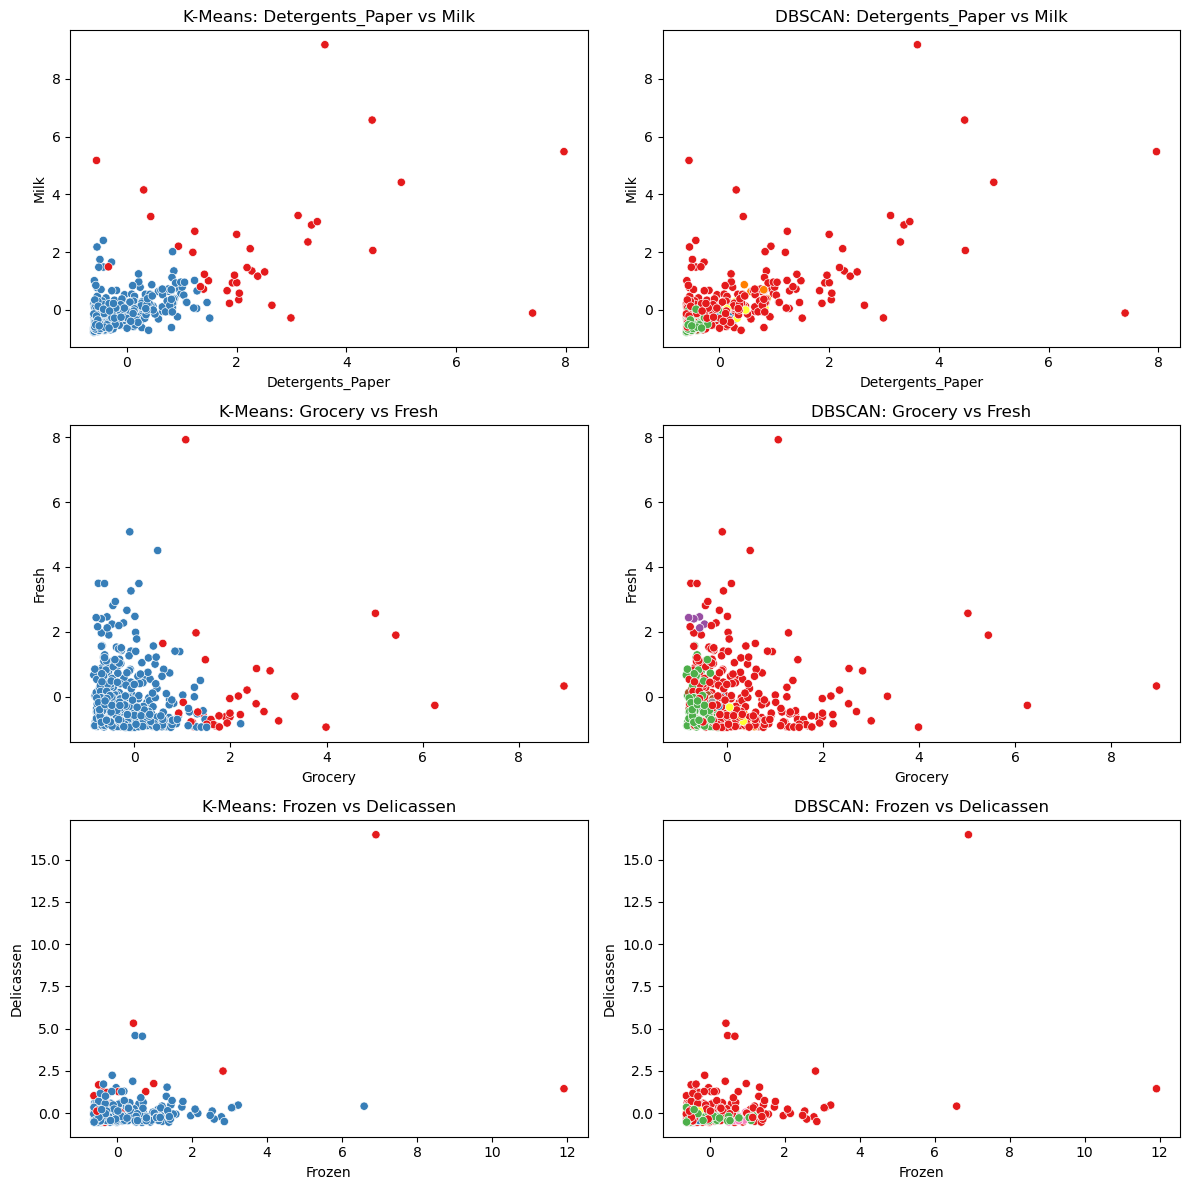

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los pares de columnas a visualizar
column_pairs = [
    ('Detergents_Paper', 'Milk'),
    ('Grocery', 'Fresh'),
    ('Frozen', 'Delicassen')
]

# Crear una figura para los gráficos
fig, axes = plt.subplots(len(column_pairs), 2, figsize=(12, 12))

# Iterar a través de los pares de columnas
for i, (x_col, y_col) in enumerate(column_pairs):
    # Graficar K-Means
    sns.scatterplot(x=customers_scale[x_col], y=customers_scale[y_col], 
                    hue=customers_scale['Label'], palette='Set1', ax=axes[i, 0], legend=None)
    axes[i, 0].set_title(f'K-Means: {x_col} vs {y_col}')
    axes[i, 0].set_xlabel(x_col)
    axes[i, 0].set_ylabel(y_col)

    # Graficar DBSCAN
    sns.scatterplot(x=customers_scale[x_col], y=customers_scale[y_col], 
                    hue=customers_scale['labels_DBSCAN'], palette='Set1', ax=axes[i, 1], legend=None)
    axes[i, 1].set_title(f'DBSCAN: {x_col} vs {y_col}')
    axes[i, 1].set_xlabel(x_col)
    axes[i, 1].set_ylabel(y_col)

# Ajustar los espacios entre los subgráficos
plt.tight_layout()
plt.show()

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [190]:
# Your code here:
# Agrupar por las etiquetas de K-Means ('Label') y calcular la media de todas las columnas
kmeans_grouped = customers_scale.groupby('Label').mean()

# Agrupar por las etiquetas de DBSCAN ('labels_DBSCAN') y calcular la media de todas las columnas
dbscan_grouped = customers_scale.groupby('labels_DBSCAN').mean()

# Mostrar las medias calculadas
print("Medias de las columnas por grupos de K-Means:")
print(kmeans_grouped)

print("\nMedias de las columnas por grupos de DBSCAN:")
print(dbscan_grouped)



Medias de las columnas por grupos de K-Means:
          Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
Label                                                                         
0      0.123162  2.187566  2.386300  0.391153          2.443045    0.929210   
1     -0.010975 -0.194932 -0.212641 -0.034855         -0.217697   -0.082801   

       Channel_2  Region_2  Region_3  labels  labels_DBSCAN  
Label                                                        
0       0.916667  0.166667  0.638889     1.0      -1.000000  
1       0.269802  0.101485  0.725248     0.0       0.358911  

Medias de las columnas por grupos de DBSCAN:
                  Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
labels_DBSCAN                                                             
-1             0.136885  0.347752  0.372203  0.149113          0.309780   
 0            -0.047439 -0.306575 -0.128764 -0.484978          0.142681   
 1            -0.227300 -0.533618 -0.582337

¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

K-Means puede ser más útil si buscas un agrupamiento simple en dos grandes grupos de clientes. Para segmentación más flexible y capaz de manejar ruido, DBSCAN es una mejor opción.

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
